In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import itertools

def de_bruijnize(st, k):
    edges = []
    nodes = set()
    not_starts = set()
    for i in range(len(st)-k+1):
        edges.append((st[i:i+k-1],st[i+1:i+k]))
        nodes.add(st[i:i+k-1])
        nodes.add(st[i+1:i+k])
        not_starts.add(st[i+1:i+k])
    return nodes,edges,list(nodes-not_starts)

# def debruijnize(reads):
#     nodes = set()
#     not_starts = set()
#     edges = []
#     for r in reads:
#         r1 = r[:-1]
#         r2 = r[1:]
#         nodes.add(r1)
#         nodes.add(r2)
#         edges.append((r1,r2))
#         not_starts.add(r2)
#     return (nodes,edges,list(nodes-not_starts))

def visual(st, k):
    G = nx.DiGraph(directed=True)

    nodes, edges= de_bruijnize(st, k)[0:2]
    for node in nodes:
        G.add_node(node)

    G.add_edges_from(edges)
    print(G.nodes)
    print(G.edges)
    options = {
    'node_color': 'yellow',
    'node_size': 700,
    'width': 2,
    'arrowstyle': '-|>',
    'arrowsize': 10,}

    pos=nx.spring_layout(G)
    nx.draw_networkx(G, arrows=True, **options)
    plt. show()

def build_k_mer(str,k):
    return [str[i:k+i] for i in range(0,len(str)-k+1)]


def make_node_edge_map(edges):
    node_edge_map = {}
    for e in edges:
        n = e[0]
        if n in node_edge_map:
            node_edge_map[n].append(e[1])
        else:
            node_edge_map[n] = [e[1]]
    return node_edge_map


def eulerian_trail(m,v):
    nemap = m
    result_trail = []
    start = v
    result_trail.append(start)
    while(True):
        trail = []
        previous = start
        while(True):
            
            if(previous not in nemap):
                break
            next = nemap[previous].pop()
            if(len(nemap[previous]) == 0):
                nemap.pop(previous,None)
            trail.append(next)
            if(next == start):
                break;
            previous = next
        # completed one trail
        print(trail)
        index = result_trail.index(start)
        result_trail = result_trail[0:index+1] + trail + result_trail[index+1:len(result_trail)]
        # choose new start
        if(len(nemap)==0):
          break
        found_new_start = False
        for n in result_trail:
            if n in nemap:
                start = n
                found_new_start = True
                break # from for loop
        if not found_new_start:
            print("error")
            print("result_trail",result_trail)
            print(nemap)
            break
    return result_trail

def assemble_trail(trail):
    if len(trail) == 0:
        return ""
    result = trail[0][:-1]
    for node in trail:
        result += node[-1]
    return result
# def test_assembly_debruijn(t,k):
#     reads = build_k_mer(t,k)
#     G = debruijnize(reads)
#     v = visualize_debruijn(G)
#     nemap = make_node_edge_map(G[1])
#     print(G)
#     print(v)
#     start = next(iter(G[2])) if (len(G[2]) > 0) else next(iter(G[0]))
#     trail = eulerian_trail(nemap,start)
#     return assemble_trail(trail)
# genome eg: ATCGTTGCGCGACCG
st=input()
k=int(input())
reads = build_k_mer(st, k)
print(reads)

print("\nDe brugin reads are:")
# G = debruijnize(reads)
G = de_bruijnize(st,k)
print(G)

ATCGTTGCGCGACCG
4
['ATCG', 'TCGT', 'CGTT', 'GTTG', 'TTGC', 'TGCG', 'GCGC', 'CGCG', 'GCGA', 'CGAC', 'GACC', 'ACCG']

De brugin reads are:
({'GTT', 'GCG', 'ATC', 'CCG', 'CGA', 'TGC', 'CGT', 'GAC', 'ACC', 'TCG', 'CGC', 'TTG'}, [('ATC', 'TCG'), ('TCG', 'CGT'), ('CGT', 'GTT'), ('GTT', 'TTG'), ('TTG', 'TGC'), ('TGC', 'GCG'), ('GCG', 'CGC'), ('CGC', 'GCG'), ('GCG', 'CGA'), ('CGA', 'GAC'), ('GAC', 'ACC'), ('ACC', 'CCG')], ['ATC'])


In [3]:
m = make_node_edge_map(G[1])
print(m)

{'ATC': ['TCG'], 'TCG': ['CGT'], 'CGT': ['GTT'], 'GTT': ['TTG'], 'TTG': ['TGC'], 'TGC': ['GCG'], 'GCG': ['CGC', 'CGA'], 'CGC': ['GCG'], 'CGA': ['GAC'], 'GAC': ['ACC'], 'ACC': ['CCG']}


In [4]:
start = G[2][0] if (len(G[2]) > 0) else G[0][0]
# print (m)

In [5]:
t = eulerian_trail(m,start)
print(t)

['TCG', 'CGT', 'GTT', 'TTG', 'TGC', 'GCG', 'CGA', 'GAC', 'ACC', 'CCG']
['CGC', 'GCG']
['ATC', 'TCG', 'CGT', 'GTT', 'TTG', 'TGC', 'GCG', 'CGC', 'GCG', 'CGA', 'GAC', 'ACC', 'CCG']


['GTT', 'GCG', 'ATC', 'CCG', 'CGA', 'TGC', 'CGT', 'GAC', 'ACC', 'TCG', 'CGC', 'TTG']
[('GTT', 'TTG'), ('GCG', 'CGC'), ('GCG', 'CGA'), ('ATC', 'TCG'), ('CGA', 'GAC'), ('TGC', 'GCG'), ('CGT', 'GTT'), ('GAC', 'ACC'), ('ACC', 'CCG'), ('TCG', 'CGT'), ('CGC', 'GCG'), ('TTG', 'TGC')]


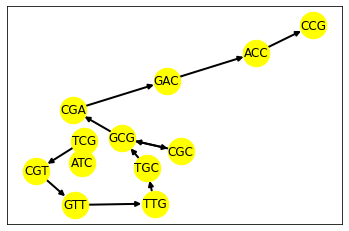

In [6]:
visual(st, k)

In [7]:
assemble_trail(t)

'ATCGTTGCGCGACCG'